Here we're going to test models that we've got.

In [1]:
import sys
sys.path.append('../scripts/training_models/')
sys.path.append('../scripts/data_processing/')
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

from tensorflow import keras
from sklearn.metrics import accuracy_score
import training_model_wandb
import visualizing_results

plt.style.use('seaborn')

#  Rock

## Loading model 

In [2]:
model = keras.models.load_model("../models/rock/non_UV_best.h5")

In [3]:
_, _, test_generator = training_model_wandb.prepare_generators(path="../data/huge data/",
                           image_size=(
                               224, 224),
                           batch_size=8,
                           category_type="rock",
                           training_folder="non-UV")

Found 7848 images belonging to 4 classes.
Found 2388 images belonging to 4 classes.
Found 1060 images belonging to 4 classes.


## Generating outputs 

In [4]:
y_test_labels = test_generator.classes

In [5]:
y_score = model.predict_generator(test_generator)

Encoding elements of labels list with arrays, where 1 defines whether elements belongs to category.

In [6]:
y_test = np.array(visualizing_results.input_array_as_array_of_arrays(y_test_labels))

## Visualizing results 

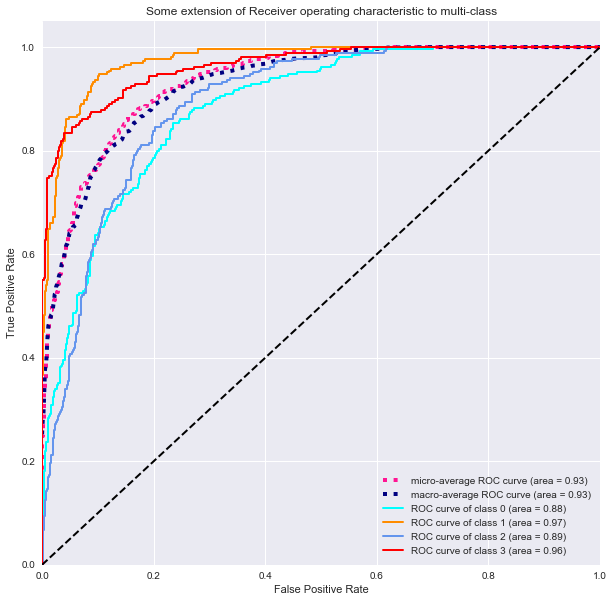

True

In [7]:
visualizing_results.draw_roc_auc_plots(y_test, y_score, test_generator.num_classes)

In [8]:
display(test_generator.class_indices)

{'алевролит': 0, 'аргиллит': 1, 'переслой': 2, 'песчаник': 3}

In [9]:
print("Classifier accuracy: {:.2f}".format(accuracy_score(y_test_labels, [np.argmax(i) for i in y_score])))

Classifier accuracy: 0.75


# Carbonate

# Saturation

# Ruin 